In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

**STEP 1**: open exploration

2000 randomly generated scenarios with no policy with aggregated results over the complete region (problem_formulation_id == 0)

In [3]:
# Reading the results file
from ema_workbench import load_results
file_name = 'nopolicy_locations.tar.gz'
results = load_results(file_name)
# Extracting experiment and outcomes from results
experiments, outcomes = results

In [4]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,2.0,227.098453,10.0,0.898324,188.431876,10.0,0.890435,300.775745,1.5,0.017882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Policy 0,dikesnet
1,129.0,284.050159,1.0,0.277784,39.187579,1.5,0.190226,316.402541,1.0,0.414977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Policy 0,dikesnet
2,43.0,180.811431,1.5,0.117368,80.143742,10.0,0.395970,41.086837,10.0,0.464410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Policy 0,dikesnet
3,9.0,235.391811,1.0,0.500938,141.968572,1.0,0.386457,342.319566,1.5,0.309354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Policy 0,dikesnet
4,107.0,52.996365,1.5,0.242302,235.234132,10.0,0.934777,246.009228,1.0,0.849877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,118.0,88.191894,1.5,0.673930,349.102367,1.5,0.841251,73.240851,1.0,0.187268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,Policy 0,dikesnet
1996,31.0,120.810318,1.5,0.066637,308.712863,1.5,0.269274,310.086452,1.0,0.864223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996,Policy 0,dikesnet
1997,24.0,127.946494,10.0,0.332577,72.388259,10.0,0.825417,227.599884,1.0,0.371376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997,Policy 0,dikesnet
1998,119.0,322.892233,10.0,0.781029,248.297393,1.0,0.543604,45.309125,10.0,0.233297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998,Policy 0,dikesnet


In [5]:
outcomes

{'A.1 Total Costs': array([0.00000000e+00, 2.73457633e+09, 2.77483832e+09, ...,
        2.41384171e+09, 2.02245845e+06, 2.60398370e+09]),
 'A.1_Expected Number of Deaths': array([0.00000000e+00, 2.00015515e+00, 2.03727868e+00, ...,
        1.50875803e+00, 1.56210786e-03, 2.03032013e+00]),
 'A.2 Total Costs': array([16653425.80449799,        0.        ,        0.        , ...,
               0.        , 63306903.47404538,        0.        ]),
 'A.2_Expected Number of Deaths': array([0.01235558, 0.        , 0.        , ..., 0.        , 0.06402087,
        0.        ]),
 'A.3 Total Costs': array([2.97490597e+09, 0.00000000e+00, 0.00000000e+00, ...,
        8.37431791e+07, 1.51608679e+09, 8.84886480e+06]),
 'A.3_Expected Number of Deaths': array([3.74603241, 0.        , 0.        , ..., 0.13768847, 2.74939106,
        0.01832726]),
 'A.4 Total Costs': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.4_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.5 Total Costs': array([   

In [6]:
df_outcomes = pd.DataFrame.from_dict(outcomes)

In [7]:
df_outcomes

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,0.000000e+00,0.000000,1.665343e+07,0.012356,2.974906e+09,3.746032,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
1,2.734576e+09,2.000155,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
2,2.774838e+09,2.037279,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.464623e+07,0.014461,0.0,0.0
3,1.740507e+08,0.144316,1.146265e+08,0.125225,4.678177e+08,0.967381,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
4,2.600626e+09,2.026868,0.000000e+00,0.000000,4.963715e+06,0.010717,1.770298e+07,0.009954,2.498744e+07,0.026321,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.112544e+07,0.031399,2.079279e+07,0.021514,1.513993e+09,2.744970,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
1996,2.611663e+09,2.037693,3.352479e+07,0.035827,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
1997,2.413842e+09,1.508758,0.000000e+00,0.000000,8.374318e+07,0.137688,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
1998,2.022458e+06,0.001562,6.330690e+07,0.064021,1.516087e+09,2.749391,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0


In [8]:
df_outcomes.max("")

ValueError: No axis named  for object type <class 'pandas.core.frame.DataFrame'>

In [ ]:
sns.pairplot(df_outcomes)
plt.show()

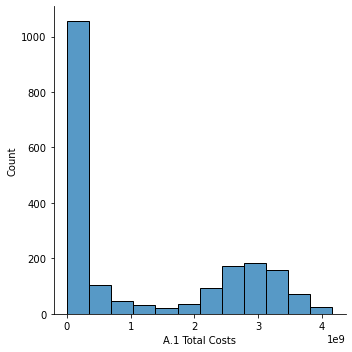

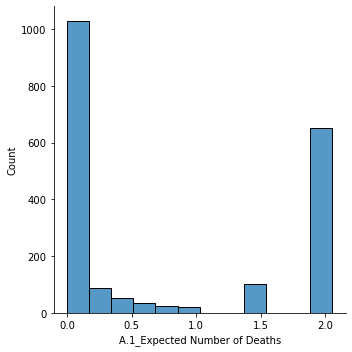

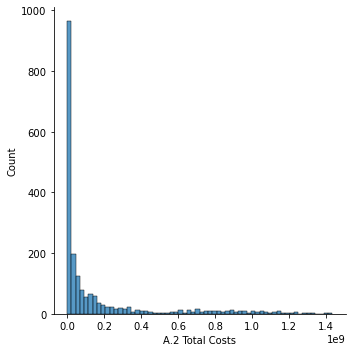

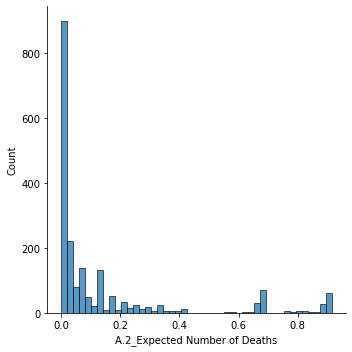

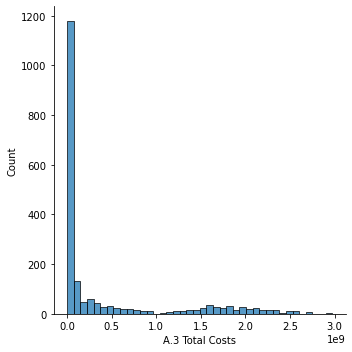

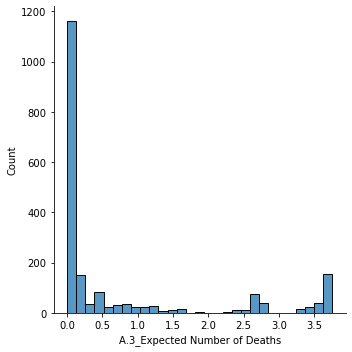

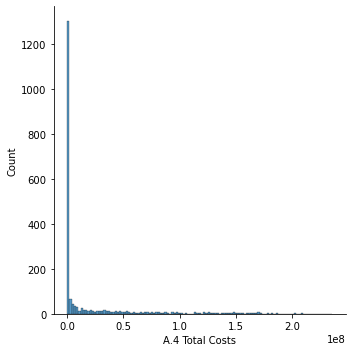

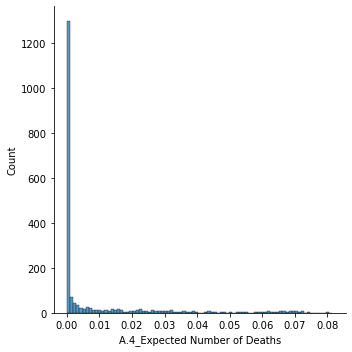

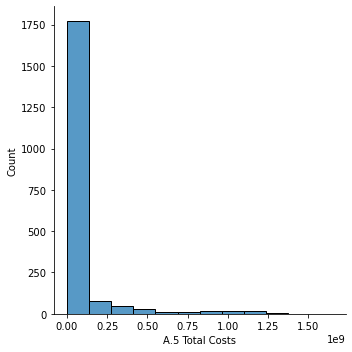

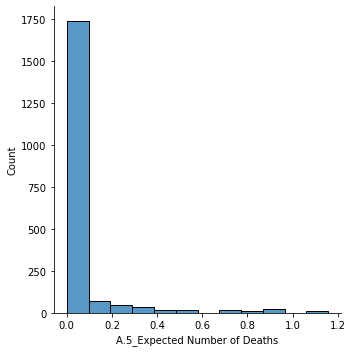

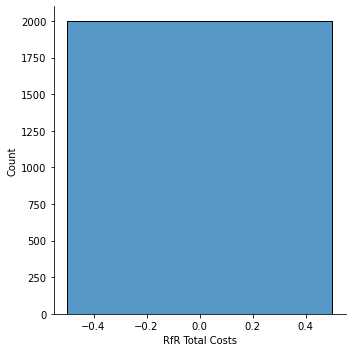

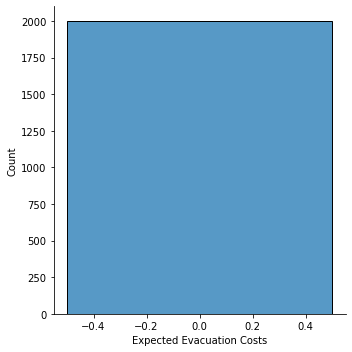

In [9]:
for col in df_outcomes:
    sns.displot(df_outcomes,x = col)
    plt.show()
    

In [17]:
from ema_workbench.analysis import prim

data = df_outcomes["A.3_Expected Number of Deaths"]

y = data >= np.percentile(data, 90)

prim_alg = prim.Prim(experiments,y, threshold=0.8, peel_alpha=0.05)
box1 = prim_alg.find_box()

In [18]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage       0.955
density     0.812766
id                41
mass          0.1175
mean        0.812766
res_dim            3
Name: 41, dtype: object

             box 41                                           
                min       max                        qp values
A.3_pfail  0.000035  0.152353  [-1.0, 3.4388956121309965e-126]
A.1_pfail  0.207363  0.999527     [6.23237606107315e-06, -1.0]
A.2_pfail  0.050029  0.999905      [0.14989086919705089, -1.0]



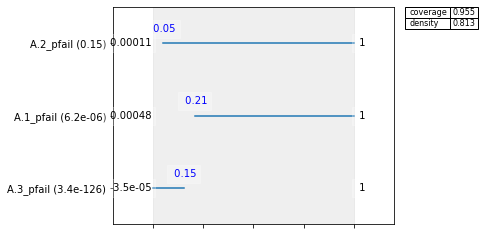

In [19]:
box1.inspect(41)
box1.inspect(41, style='graph')
plt.show()